In [1]:
# Importing the libraries

import os

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set()

In [3]:
import pandas as pa

In [4]:
data_train= pa.read_csv(r'https://drive.google.com/file/d/1ccy5A6vV3iWPyEgu2kdkyFR9_XEMORtR/view?usp=drive_link')
data_test= pa.read_csv(r'https://drive.google.com/file/d/1x8rssxe0IrZzgH1pN1ORhzwuUtlZFQzm/view?usp=drive_link')

ParserError: ignored

In [ ]:
data_train.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col2388,Col2389,Col2390,Col2391,Col2392,Col2393,Col2394,Col2395,Col2396,Col2397
0,RIGHGSN,1,1.086711e+04,8.648345e+03,1.576618e+04,2.890466e+04,5.273655e+03,2.346153e+04,1.285597e+04,2.871509e+04,...,0,1,0,1,214.0,214.0,68.0,22.0,22.0,7.0
1,RIMHI5ZGP,0,2.584312e+05,2.179633e+05,1.866287e+05,1.866287e+05,2.154519e+05,1.923615e+05,1.726538e+05,1.666974e+05,...,0,0,0,0,41.0,41.0,38.0,12.0,12.0,11.0
2,RIHOG1SZU,0,1.459355e+07,1.260060e+07,1.100315e+07,1.010315e+07,1.879882e+07,1.514035e+07,5.320778e+06,6.906324e+06,...,0,1,1,0,378.0,378.0,310.0,21.0,21.0,16.0
3,RIHOLMQWU,0,6.727043e+05,8.181116e+05,6.794893e+05,6.794893e+05,8.257254e+05,7.605803e+05,3.577134e+05,4.236612e+05,...,0,0,0,0,702.0,702.0,644.0,951.0,951.0,743.0
4,RIHO584ET,0,-1.218742e+06,-3.005361e+06,-1.666241e+05,-2.403574e+06,2.583183e+06,2.086546e+06,5.938358e+06,5.446532e+06,...,0,0,0,0,1305.0,1305.0,1211.0,2205.0,2205.0,1831.0


In [ ]:
data_test.head()

,Col1,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,...,Col2388,Col2389,Col2390,Col2391,Col2392,Col2393,Col2394,Col2395,Col2396,Col2397
0,RIGD58ZWD,8.167140e+04,8.614542e+04,7.532296e+04,7.532296e+04,1.125174e+05,1.002778e+05,2.038915e+04,3.053853e+04,8.395911e+04,...,0,0,0,0,44.0,44.0,23.0,41.0,41.0,36.0
1,RIH660YDS,-1.362824e+07,-4.493043e+06,-3.777257e+06,-4.493043e+06,-4.749764e+06,-4.749764e+06,1.147556e+07,1.147556e+07,1.272055e+07,...,1,1,2,2,1234.0,1234.0,680.0,154.0,153.0,86.0
2,RIH660Q96,1.302700e+06,1.341449e+06,1.240085e+06,1.341449e+06,1.477503e+06,1.477503e+06,3.904086e+05,3.904086e+05,4.979106e+05,...,0,0,0,0,33.0,24.0,19.0,3.0,1.0,1.0
3,RIYDO15W1,1.932258e+05,1.454433e+05,1.929148e+05,1.454433e+05,1.318250e+04,1.318250e+04,8.650108e+04,8.650108e+04,5.896693e+03,...,0,0,0,0,8.0,8.0,3.0,7.0,7.0,3.0
4,RIYBGC1ZD,3.913385e+05,1.987337e+05,1.703432e+05,1.987337e+05,3.046536e+05,3.046536e+05,2.528307e+05,2.528307e+05,3.034449e+05,...,0,0,0,0,7.0,7.0,7.0,6.0,6.0,5.0


In [ ]:
data_train.shape

(17521, 2395)

In [ ]:
data_test.shape

(20442, 2394)

In [ ]:
# Checking the datatypes and null/non-null distribution
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17521 entries, 0 to 17520
Columns: 2395 entries, Col1 to Col2397
dtypes: float64(844), int64(1548), object(3)
memory usage: 320.2+ MB


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20442 entries, 0 to 20441
Columns: 2394 entries, Col1 to Col2397
dtypes: float64(837), int64(1545), object(12)
memory usage: 373.4+ MB


In [ ]:
# Checking distribution of numerical values in the dataset
data_train.describe()

,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,...,Col2388,Col2389,Col2390,Col2391,Col2392,Col2393,Col2394,Col2395,Col2396,Col2397
count,17521.000000,1.752100e+04,1.752100e+04,1.752100e+04,1.752100e+04,1.752100e+04,1.752100e+04,1.752100e+04,1.752100e+04,1.752100e+04,...,17521.000000,17521.000000,17521.000000,17521.000000,16347.000000,16347.000000,16335.000000,16347.00000,16347.000000,16335.000000
mean,0.100508,3.158967e+04,2.046540e+04,2.502937e+04,2.789385e+04,2.597734e+04,3.302600e+04,2.912693e+04,2.971069e+04,3.617392e+04,...,0.736202,0.595343,0.773757,0.639005,55.540038,55.015416,35.180961,17.99584,17.539977,10.359657
std,0.300685,7.612897e+05,7.136908e+05,6.018207e+05,6.091245e+05,7.211998e+05,7.488433e+05,2.175595e+05,2.981508e+05,2.612427e+05,...,0.910828,0.784953,0.921805,0.806286,53.269618,52.697069,34.956016,24.83891,24.685954,18.476447
min,0.000000,-8.555719e+07,-8.555719e+07,-7.011955e+07,-7.100920e+07,-8.480658e+07,-9.016250e+07,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,2.742337e+03,2.007863e+03,1.857013e+03,2.562647e+03,2.973188e+03,3.822170e+03,1.824148e+03,1.787456e+03,3.505288e+03,...,0.000000,0.000000,0.000000,0.000000,21.000000,21.000000,12.000000,9.00000,9.000000,5.000000
50%,0.000000,9.308060e+03,6.642857e+03,6.236503e+03,8.464355e+03,1.036962e+04,1.303534e+04,5.705458e+03,5.536147e+03,8.832639e+03,...,0.000000,0.000000,0.000000,0.000000,42.000000,42.000000,27.000000,13.00000,13.000000,7.000000
75%,0.000000,3.053873e+04,2.156093e+04,2.068154e+04,2.773849e+04,2.645998e+04,3.359204e+04,1.852222e+04,1.753976e+04,2.341911e+04,...,1.000000,1.000000,1.000000,1.000000,74.000000,73.000000,47.000000,21.00000,21.000000,12.000000
max,1.000000,1.459355e+07,1.288980e+07,1.478068e+07,1.178075e+07,1.879882e+07,1.514035e+07,1.125630e+07,2.788633e+07,1.314762e+07,...,4.000000,4.000000,4.000000,4.000000,1305.000000,1305.000000,1211.000000,2205.00000,2205.000000,1831.000000


In [ ]:
data_test.describe()

,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,...,Col2388,Col2389,Col2390,Col2391,Col2392,Col2393,Col2394,Col2395,Col2396,Col2397
count,2.044200e+04,2.044200e+04,2.044200e+04,2.044200e+04,2.044200e+04,2.044200e+04,2.044200e+04,2.044200e+04,2.044200e+04,2.044200e+04,...,20442.000000,20442.000000,20442.000000,20442.000000,19183.000000,19183.000000,19164.000000,19183.000000,19183.000000,19164.000000
mean,3.749822e+04,2.360107e+04,3.099296e+04,3.153122e+04,2.728287e+04,3.625497e+04,3.282116e+04,3.295643e+04,3.903867e+04,3.901378e+04,...,0.634674,0.558262,0.670238,0.589864,49.688474,49.131366,31.288614,17.008341,16.527238,9.726936
std,8.090349e+05,6.659282e+05,6.434903e+05,6.422364e+05,6.588844e+05,6.710696e+05,3.642904e+05,3.831866e+05,4.169885e+05,4.400329e+05,...,0.853880,0.784091,0.867530,0.796850,62.765442,61.032971,38.698616,29.464562,29.155274,17.616897
min,-6.766640e+07,-6.416449e+07,-2.951962e+07,-5.160258e+07,-6.282747e+07,-5.448213e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,3.037609e+03,2.255115e+03,2.081114e+03,2.788630e+03,3.028607e+03,3.903768e+03,1.966539e+03,1.908582e+03,3.270135e+03,2.960897e+03,...,0.000000,0.000000,0.000000,0.000000,16.000000,16.000000,10.000000,8.000000,8.000000,4.000000
50%,1.076447e+04,7.793441e+03,7.511782e+03,1.022429e+04,1.075722e+04,1.369641e+04,6.529336e+03,6.173574e+03,8.926603e+03,8.363056e+03,...,0.000000,0.000000,0.000000,0.000000,35.000000,35.000000,22.000000,12.000000,12.000000,7.000000
75%,3.444611e+04,2.380610e+04,2.329657e+04,3.127464e+04,2.776564e+04,3.611465e+04,2.015090e+04,1.929168e+04,2.482480e+04,2.306036e+04,...,1.000000,1.000000,1.000000,1.000000,65.000000,64.000000,42.000000,20.000000,19.000000,12.000000
max,3.861868e+07,3.024852e+07,6.325956e+07,2.766654e+07,2.193012e+07,2.229041e+07,3.463760e+07,3.277868e+07,4.255362e+07,3.969719e+07,...,4.000000,4.000000,4.000000,4.000000,3598.000000,3597.000000,1946.000000,3104.000000,3104.000000,1745.000000


In [ ]:
# Check missing values for each feature
data_train.isnull().sum()

Col1          0
Col2          0
Col3          0
Col4          0
Col5          0
           ... 
Col2393    1174
Col2394    1186
Col2395    1174
Col2396    1174
Col2397    1186
Length: 2395, dtype: int64

In [ ]:
data_test.isnull().sum()

Col1          0
Col3          0
Col4          0
Col5          0
Col6          0
           ... 
Col2393    1259
Col2394    1278
Col2395    1259
Col2396    1259
Col2397    1278
Length: 2394, dtype: int64

In [ ]:
df1 =data_train.loc[:, "Col1":"Col100":1]

In [ ]:
df1

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col91,Col92,Col93,Col94,Col95,Col96,Col97,Col98,Col99,Col100
0,RIGHGSN,1,1.086711e+04,8.648345e+03,1.576618e+04,2.890466e+04,5.273655e+03,2.346153e+04,1.285597e+04,2.871509e+04,...,0,17.980863,8.741156,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,RIMHI5ZGP,0,2.584312e+05,2.179633e+05,1.866287e+05,1.866287e+05,2.154519e+05,1.923615e+05,1.726538e+05,1.666974e+05,...,0,0.957537,12.401945,0.0,NaN,0.0,NaN,0.0,NaN,0.0
2,RIHOG1SZU,0,1.459355e+07,1.260060e+07,1.100315e+07,1.010315e+07,1.879882e+07,1.514035e+07,5.320778e+06,6.906324e+06,...,0,0.482401,0.647102,1.0,NaN,1.0,NaN,1.0,NaN,1.0
3,RIHOLMQWU,0,6.727043e+05,8.181116e+05,6.794893e+05,6.794893e+05,8.257254e+05,7.605803e+05,3.577134e+05,4.236612e+05,...,1,0.223275,0.544524,0.0,2.0,0.0,2.0,0.0,NaN,1.0
4,RIHO584ET,0,-1.218742e+06,-3.005361e+06,-1.666241e+05,-2.403574e+06,2.583183e+06,2.086546e+06,5.938358e+06,5.446532e+06,...,0,-0.479454,0.037414,2.0,0.0,2.0,0.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17516,M9ERLMQ,0,9.404683e+03,3.726288e+03,3.726288e+03,7.445963e+03,2.017008e+04,4.034016e+04,5.107963e+03,4.950751e+03,...,0,2.606889,0.074651,0.0,1.0,0.0,1.0,0.0,1.0,4.0
17517,M1W6L8S,0,6.563830e+04,1.910968e+04,1.761840e+04,3.523681e+04,4.639897e+03,1.422805e+04,4.775029e+04,6.006875e+04,...,0,3.904172,0.898627,1.0,0.0,1.0,0.0,1.0,0.0,0.0
17518,MD5BL5K,0,4.220941e+04,3.173771e+04,2.539017e+04,2.539017e+04,1.005050e+04,8.040400e+03,4.354578e+04,4.097184e+04,...,0,12.921557,0.010598,1.0,0.0,1.0,0.0,1.0,0.0,NaN
17519,MYLOQ8Y,0,7.048496e+04,9.814610e+04,9.814610e+04,1.080079e+05,1.317389e+05,1.359192e+05,5.724762e+04,5.605762e+04,...,0,0.707628,8.532311,0.0,2.0,0.0,2.0,0.0,NaN,0.0


In [ ]:
df1.shape

(17521, 100)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17521 entries, 0 to 17520
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Col1    17521 non-null  object 
 1   Col2    17521 non-null  int64  
 2   Col3    17521 non-null  float64
 3   Col4    17521 non-null  float64
 4   Col5    17521 non-null  float64
 5   Col6    17521 non-null  float64
 6   Col7    17521 non-null  float64
 7   Col8    17521 non-null  float64
 8   Col9    17521 non-null  float64
 9   Col10   17521 non-null  float64
 10  Col11   17521 non-null  float64
 11  Col12   17521 non-null  float64
 12  Col13   16272 non-null  float64
 13  Col14   16277 non-null  float64
 14  Col15   16275 non-null  float64
 15  Col16   16278 non-null  float64
 16  Col17   16051 non-null  float64
 17  Col18   14661 non-null  float64
 18  Col19   2762 non-null   float64
 19  Col20   3202 non-null   float64
 20  Col21   16280 non-null  float64
 21  Col22   16277 non-null  float64
 2

In [ ]:
corr1=df1.corr()
corr1

,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,...,Col91,Col92,Col93,Col94,Col95,Col96,Col97,Col98,Col99,Col100
Col2,1.000000,-0.030748,-0.027851,-0.030471,-0.030489,-0.028520,-0.030561,-0.000675,0.009056,-0.005278,...,0.064413,-0.009818,0.003471,0.008090,-0.004571,-0.009988,-0.013479,-0.019245,0.001693,0.036229
Col3,-0.030748,1.000000,0.982237,0.900193,0.988359,0.982670,0.982962,-0.464821,-0.701978,-0.264779,...,-0.003508,0.070865,0.037133,0.016147,-0.019570,0.017504,-0.027727,0.016978,-0.026631,0.003492
Col4,-0.027851,0.982237,1.000000,0.921953,0.993567,0.994026,0.992919,-0.447950,-0.710775,-0.250169,...,0.000659,0.063163,0.027616,0.024120,-0.020740,0.024383,-0.025378,0.024130,-0.024018,0.003622
Col5,-0.030471,0.900193,0.921953,1.000000,0.919360,0.906248,0.915298,-0.348940,-0.610845,-0.153207,...,0.001389,0.067725,0.029656,0.026327,-0.016392,0.025609,-0.016572,0.023631,-0.016643,0.007929
Col6,-0.030489,0.988359,0.993567,0.919360,1.000000,0.987704,0.992882,-0.410729,-0.678968,-0.218232,...,-0.002037,0.083248,0.037311,0.044113,-0.018541,0.044072,-0.026494,0.044302,-0.025246,0.015390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Col96,-0.009988,0.017504,0.024383,0.025609,0.044072,0.021175,0.037232,0.032725,0.013396,0.016855,...,0.034437,-0.009280,-0.064156,0.845927,-0.144265,1.000000,-0.121935,0.893072,-0.116448,0.385357
Col97,-0.013479,-0.027727,-0.025378,-0.016572,-0.026494,-0.025418,-0.026650,0.008119,0.006844,0.011356,...,-0.300965,-0.014840,-0.003442,-0.165926,0.788617,-0.121935,1.000000,-0.087931,0.832920,-0.095612
Col98,-0.019245,0.016978,0.024130,0.023631,0.044302,0.021241,0.037577,0.026441,0.007137,0.011839,...,0.012994,-0.009629,-0.071706,0.755197,-0.109812,0.893072,-0.087931,1.000000,-0.085249,0.363752
Col99,0.001693,-0.026631,-0.024018,-0.016643,-0.025246,-0.026262,-0.027402,0.007706,0.005167,0.013069,...,-0.312092,-0.005680,-0.003655,-0.153818,0.687640,-0.116448,0.832920,-0.085249,1.000000,-0.108688


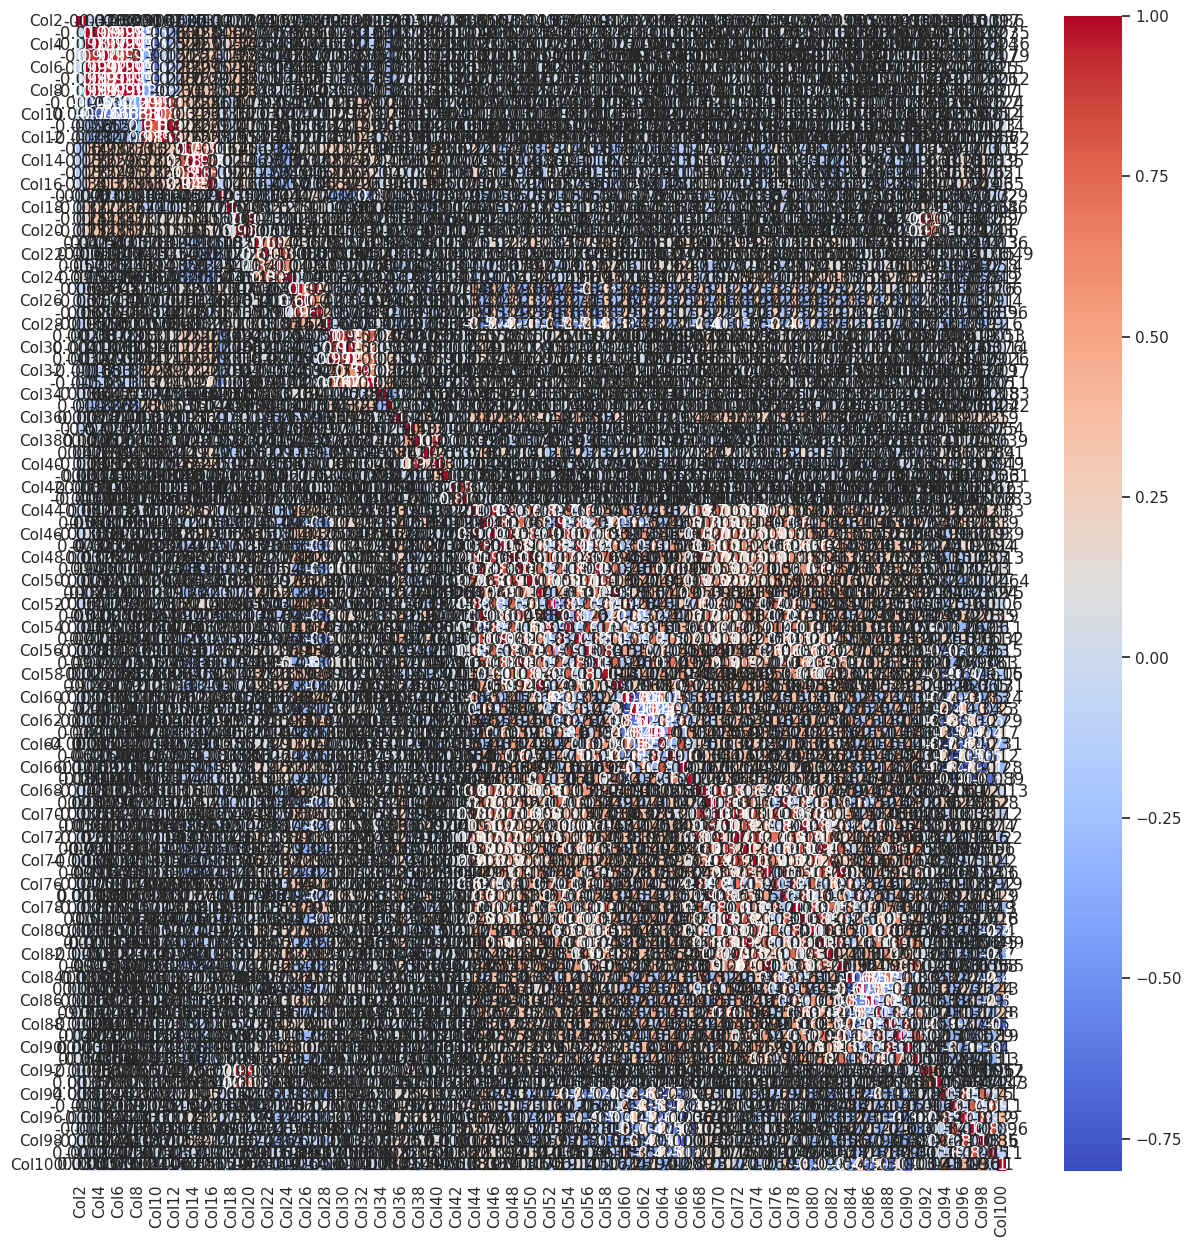

In [ ]:
# Checking the correlation in heatmap
plt.figure(figsize=(15,15))

sns.heatmap(corr1, cmap="coolwarm", annot=True)
plt.show()

array([[<AxesSubplot:title={'center':'Col2'}>,
        <AxesSubplot:title={'center':'Col3'}>,
        <AxesSubplot:title={'center':'Col4'}>,
        <AxesSubplot:title={'center':'Col5'}>,
        <AxesSubplot:title={'center':'Col6'}>,
        <AxesSubplot:title={'center':'Col7'}>,
        <AxesSubplot:title={'center':'Col8'}>,
        <AxesSubplot:title={'center':'Col9'}>,
        <AxesSubplot:title={'center':'Col10'}>,
        <AxesSubplot:title={'center':'Col11'}>],
       [<AxesSubplot:title={'center':'Col12'}>,
        <AxesSubplot:title={'center':'Col13'}>,
        <AxesSubplot:title={'center':'Col14'}>,
        <AxesSubplot:title={'center':'Col15'}>,
        <AxesSubplot:title={'center':'Col16'}>,
        <AxesSubplot:title={'center':'Col17'}>,
        <AxesSubplot:title={'center':'Col18'}>,
        <AxesSubplot:title={'center':'Col19'}>,
        <AxesSubplot:title={'center':'Col20'}>,
        <AxesSubplot:title={'center':'Col21'}>],
       [<AxesSubplot:title={'center':'Col22'}>

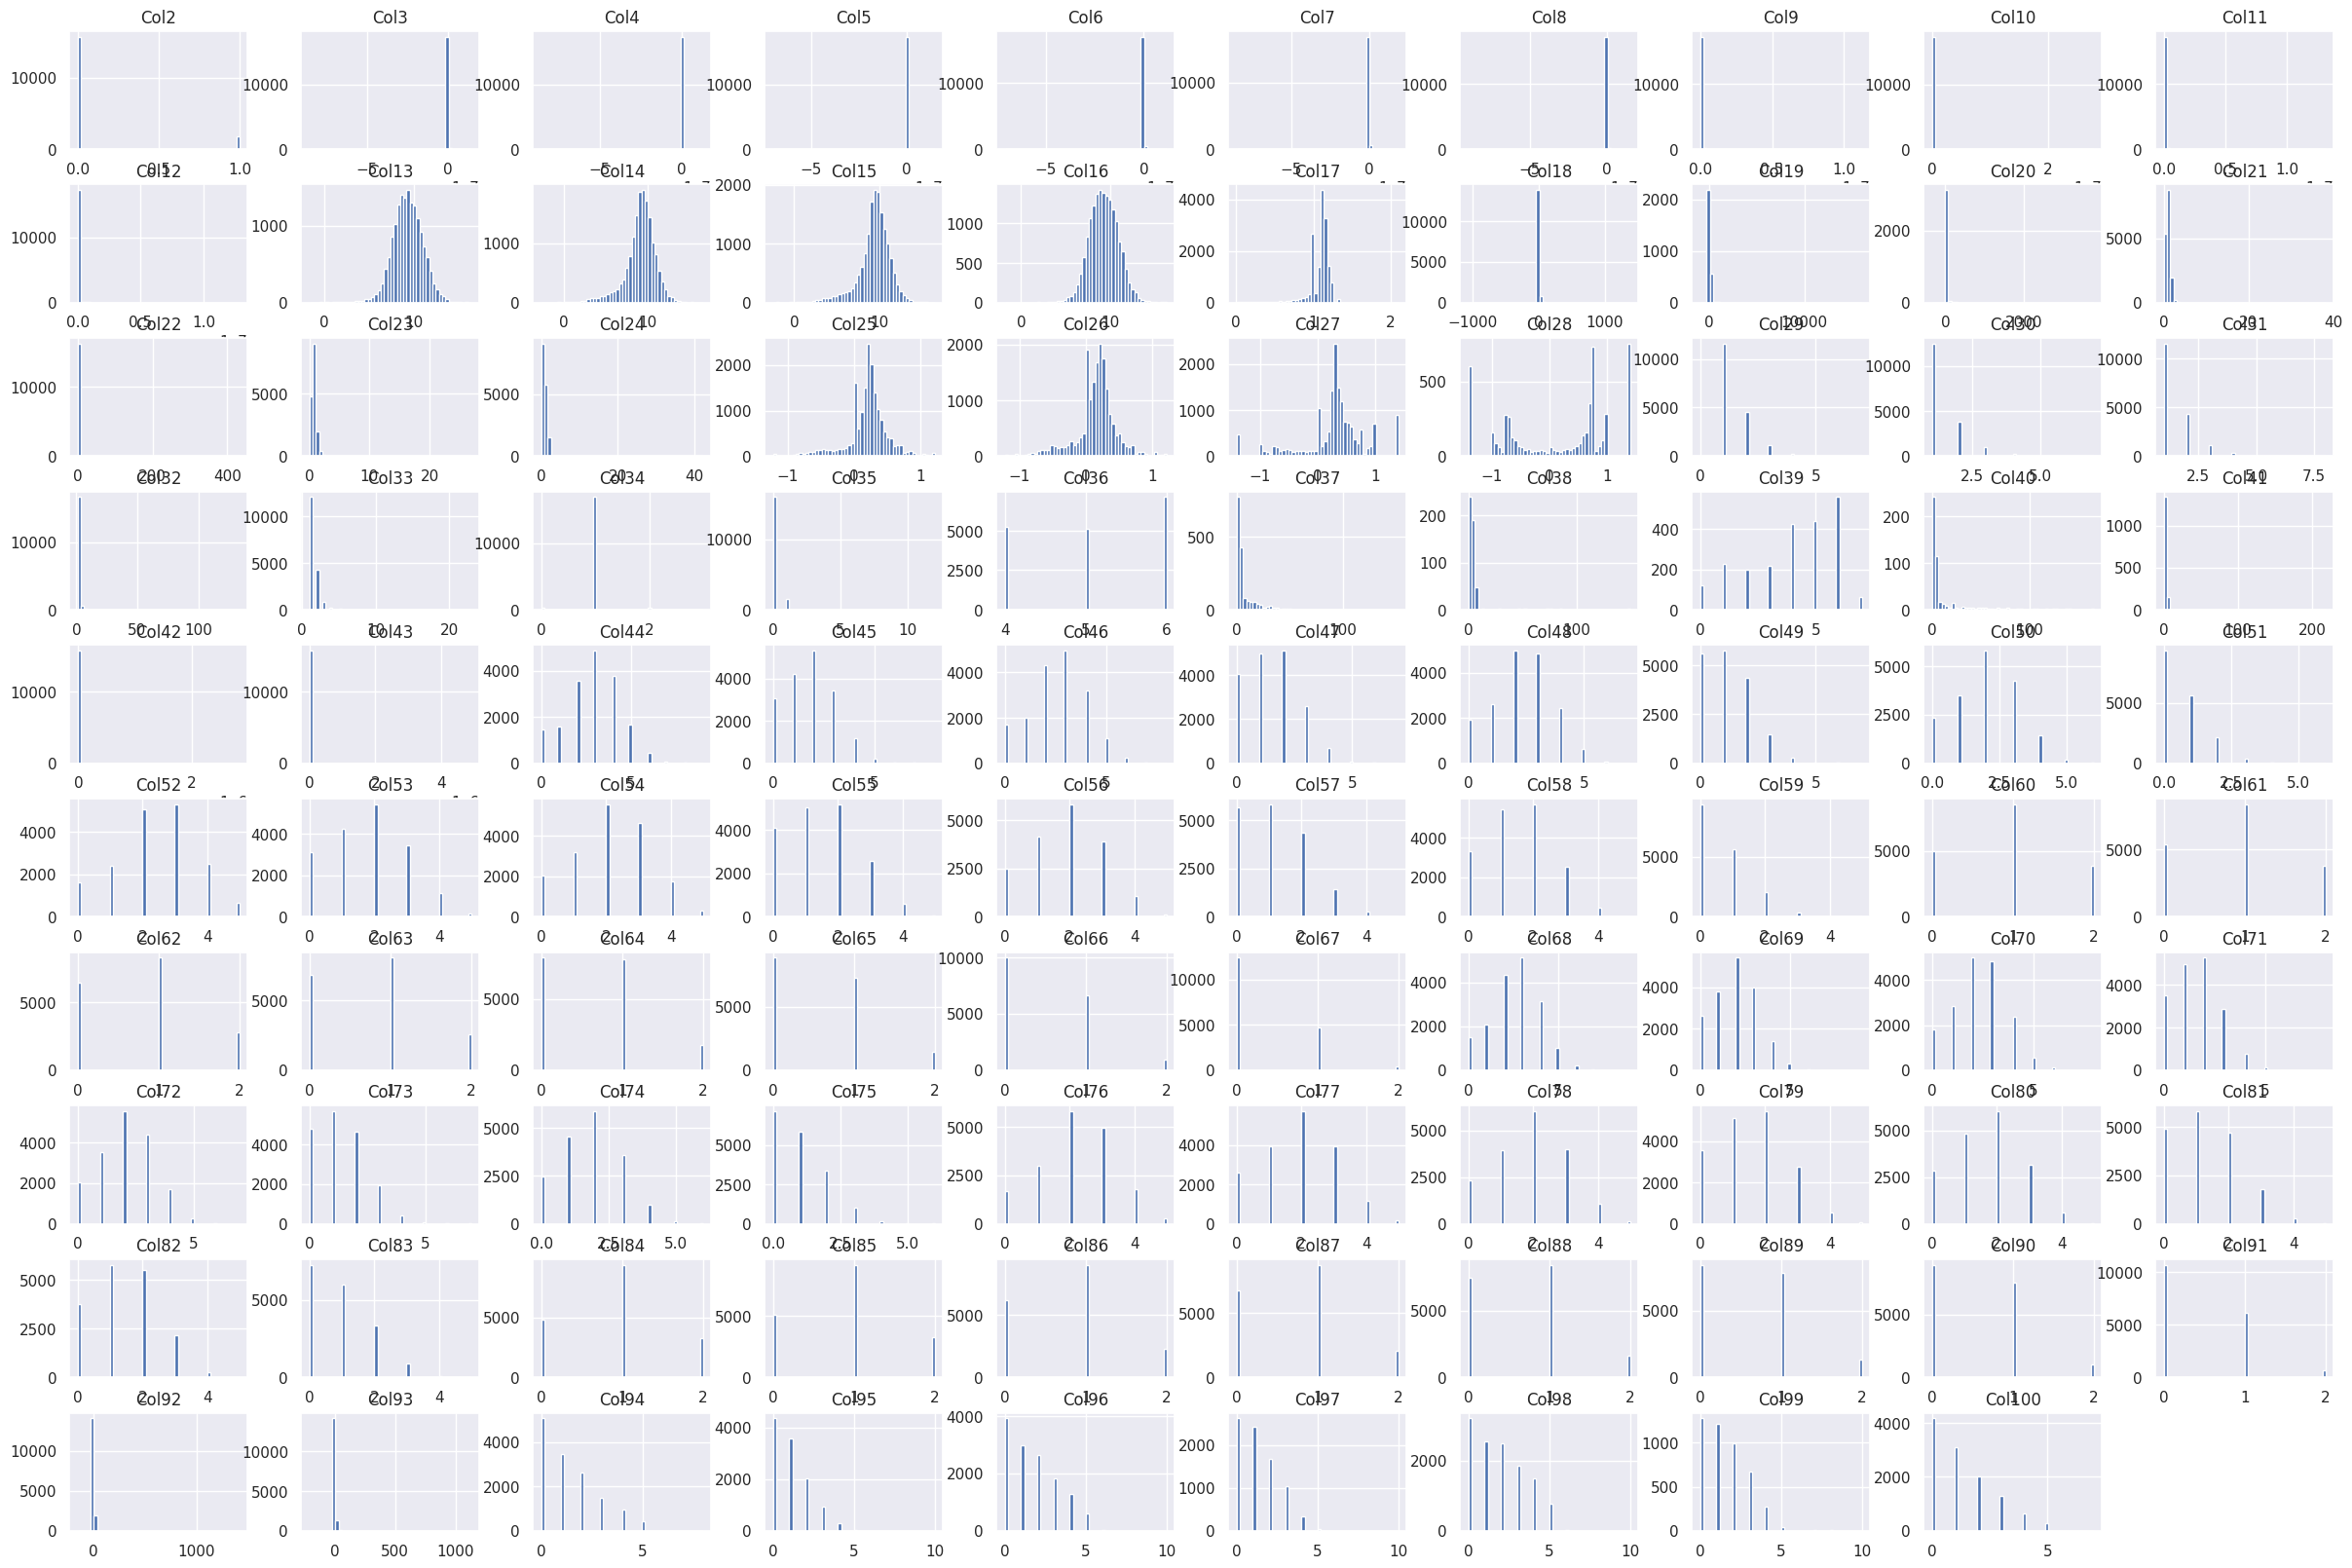

In [ ]:
df1.hist(bins=50, figsize= (30,20))

<AxesSubplot:xlabel='Col1', ylabel='count'>

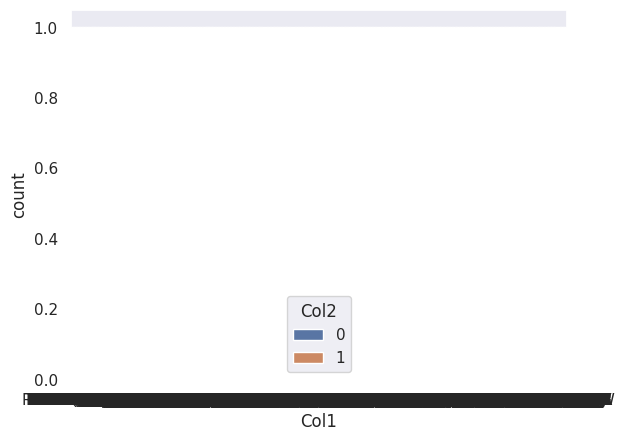

In [ ]:
sns.countplot(x='Col1',hue='Col2',data=df1)

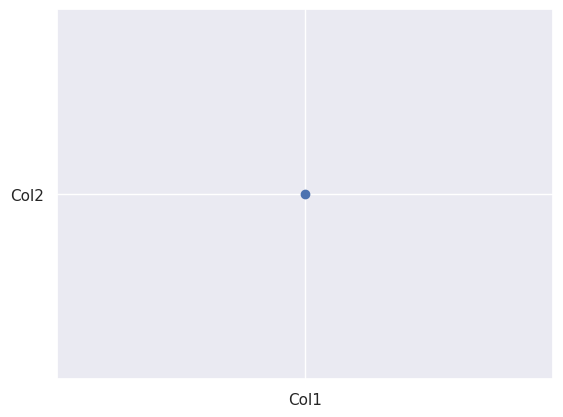

In [ ]:
plt.scatter(x='Col1', y='Col2')
plt.show()

In [ ]:
df2 = data_train.loc[:, "Col101":"Col200":1]

In [ ]:
df2

,Col101,Col102,Col103,Col104,Col105,Col106,Col107,Col108,Col109,Col110,...,Col191,Col192,Col193,Col194,Col195,Col196,Col197,Col198,Col199,Col200
0,2.0,0.0,2.0,0.0,2.0,17.980863,8.741156,0.0,1.0,0.0,...,0.0,0.500000,0.666667,32.666667,32.833333,4166.666667,0.000000e+00,85475.998330,2.813333e+02,0.0
1,NaN,0.0,NaN,0.0,NaN,0.957537,12.401945,0.0,NaN,0.0,...,0.0,4.200000,0.000000,0.600000,3.800000,0.000000,1.117646e+05,0.000000,5.134312e+05,0.0
2,NaN,1.0,NaN,1.0,NaN,0.482401,0.647102,1.0,NaN,1.0,...,0.0,7.600000,1.200000,12.800000,55.200000,0.000000,5.668554e+06,25704.000000,1.326774e+07,2000000.0
3,0.0,1.0,0.0,1.0,NaN,0.223275,0.544524,0.0,2.0,0.0,...,0.0,6.600000,0.000000,17.800000,53.800000,0.000000,4.487080e+05,25582.304000,4.704431e+06,0.0
4,2.0,1.0,2.0,1.0,2.0,-0.479454,0.037414,2.0,0.0,2.0,...,1.0,147.600000,3.600000,0.000000,41.000000,0.000000,0.000000e+00,0.000000,5.305945e+07,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17516,NaN,NaN,NaN,NaN,NaN,2.606889,0.074651,0.0,1.0,0.0,...,0.0,0.500000,3.500000,0.500000,0.666667,20600.000000,0.000000e+00,556.833333,1.666670e-01,0.0
17517,NaN,0.0,NaN,0.0,NaN,3.904172,0.898627,1.0,0.0,1.0,...,0.0,1.833333,11.333333,10.333333,10.333333,60166.666670,0.000000e+00,17282.981670,0.000000e+00,0.0
17518,NaN,NaN,NaN,NaN,NaN,12.921557,0.010598,1.0,0.0,1.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,150000.0
17519,2.0,0.0,2.0,1.0,2.0,0.420710,10.066826,0.0,2.0,0.0,...,0.0,0.142857,2.571429,1.285714,2.142857,8571.428571,1.521857e+03,544.214286,4.071429e+04,0.0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17521 entries, 0 to 17520
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Col101  11842 non-null  float64
 1   Col102  10470 non-null  float64
 2   Col103  9990 non-null   float64
 3   Col104  9509 non-null   float64
 4   Col105  7803 non-null   float64
 5   Col106  16099 non-null  float64
 6   Col107  15637 non-null  float64
 7   Col108  13635 non-null  float64
 8   Col109  11182 non-null  float64
 9   Col110  12635 non-null  float64
 10  Col111  8111 non-null   float64
 11  Col112  11612 non-null  float64
 12  Col113  4429 non-null   float64
 13  Col114  11239 non-null  float64
 14  Col115  11736 non-null  float64
 15  Col116  10089 non-null  float64
 16  Col117  9875 non-null   float64
 17  Col118  9087 non-null   float64
 18  Col119  7680 non-null   float64
 19  Col120  17521 non-null  int64  
 20  Col121  17521 non-null  int64  
 21  Col122  17521 non-null  int64  
 2

In [ ]:
df3 = data_train.loc[:, "Col201":"Col300":1]

In [ ]:
df3

,Col201,Col202,Col203,Col204,Col205,Col206,Col207,Col208,Col209,Col210,...,Col291,Col292,Col293,Col294,Col295,Col296,Col297,Col298,Col299,Col300
0,0.0,0.000000,4.269167e+03,0.0,12166.666670,8.547600e+04,8.575733e+04,0.9346,50.0000,0.0,...,0.106216,91.5888,0.0000,0.0000,0.0000,83.4713,0.0000,0.0000,0.0000,0.0000
1,0.0,23.000000,3.191776e+05,0.0,0.000000,1.117646e+05,6.251958e+05,0.0000,NaN,NaN,...,0.252478,0.0000,17.0732,4.8780,0.0000,0.0000,0.0000,0.0000,0.0000,26.6929
2,0.0,1116.080000,2.555506e+05,0.0,31000.000000,5.694258e+06,1.896200e+07,0.0000,NaN,NaN,...,0.185678,3.4392,64.2857,5.5556,0.0000,0.0670,0.0000,0.0000,5.2135,38.1546
3,0.0,891.000000,2.984598e+05,0.0,0.000000,4.742903e+05,5.178721e+06,0.0000,NaN,NaN,...,0.020233,4.4160,33.7607,1.7094,0.2849,0.4642,0.0000,0.0000,0.0000,89.1879
4,3807828.4,3079.850000,3.454484e+07,0.0,121000.000000,0.000000e+00,5.305945e+07,0.0000,NaN,NaN,...,0.337865,0.0000,13.4100,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,52.0165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17516,0.0,19.551667,1.316667e+04,0.0,20600.000000,5.568333e+02,5.570000e+02,60.0000,28.5714,0.0,...,1.753013,8.5714,0.0000,0.0000,0.0000,1.6214,0.0000,0.0000,0.0000,0.0000
17517,0.0,13.416667,4.910767e+04,0.0,60166.666670,1.728298e+04,1.728298e+04,46.8966,47.0588,0.0,...,0.593824,42.7586,0.0000,0.0000,0.0000,13.6548,0.0000,0.0000,0.0000,0.0000
17518,0.0,23.000000,0.000000e+00,0.0,0.000000,0.000000e+00,0.000000e+00,0.0000,NaN,NaN,...,NaN,0.0000,50.0000,0.0000,0.0000,0.0000,99.9847,99.9847,99.9847,99.9847
17519,0.0,0.000000,1.428571e+04,0.0,8571.428571,2.066071e+03,4.278036e+04,51.4286,27.7778,0.0,...,1.480935,20.0000,22.8571,0.0000,0.0000,0.5777,0.0000,0.0000,0.0000,44.8324


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17521 entries, 0 to 17520
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Col201  17521 non-null  float64
 1   Col202  17521 non-null  float64
 2   Col203  17521 non-null  float64
 3   Col204  17521 non-null  float64
 4   Col205  17521 non-null  float64
 5   Col206  17521 non-null  float64
 6   Col207  17521 non-null  float64
 7   Col208  16126 non-null  float64
 8   Col209  14229 non-null  float64
 9   Col210  14229 non-null  float64
 10  Col211  14229 non-null  float64
 11  Col212  14229 non-null  float64
 12  Col213  16126 non-null  float64
 13  Col214  16126 non-null  float64
 14  Col215  16126 non-null  float64
 15  Col216  16126 non-null  float64
 16  Col217  16126 non-null  float64
 17  Col218  16126 non-null  float64
 18  Col219  16126 non-null  float64
 19  Col220  16126 non-null  float64
 20  Col221  16126 non-null  float64
 21  Col222  16126 non-null  float64
 2

In [ ]:
df4 = data_train.loc[:, "Col301":"Col400":1]

In [ ]:
df4

,Col301,Col302,Col303,Col304,Col305,Col306,Col307,Col308,Col309,Col310,...,Col391,Col392,Col393,Col394,Col395,Col396,Col397,Col398,Col399,Col400
0,0.0000,0.0000,0.0000,83.4713,0.0000,0.0000,0.0,83.4713,83.4713,0.0000,...,32.666667,32.833333,4166.666667,0.0,85475.998330,2.813333e+02,0.0,0.0,0.000000,4.269167e+03
1,0.0000,0.0000,11.8345,0.0000,0.0024,0.0000,0.0,11.8345,0.0000,11.2362,...,0.600000,3.800000,0.000000,111764.6,0.000000,5.134312e+05,0.0,0.0,23.000000,3.191776e+05
2,5.2135,0.0000,14.7764,0.0670,0.0029,0.0000,0.0,14.8434,0.0670,5.0170,...,12.800000,55.200000,0.000000,5668554.0,25704.000000,1.326774e+07,2000000.0,0.0,1116.080000,2.555506e+05
3,0.0000,0.0000,8.1290,0.4642,0.0162,0.0000,0.0,8.6056,0.4642,3.7765,...,17.800000,53.800000,0.000000,448708.0,25582.304000,4.704431e+06,0.0,0.0,891.000000,2.984598e+05
4,0.0000,0.0007,0.0000,0.0000,0.7336,0.7303,0.0,0.0000,0.0000,0.0000,...,0.000000,41.000000,0.000000,0.0,0.000000,5.305945e+07,0.0,3807828.4,3079.850000,3.454484e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17516,0.0000,0.0140,0.0000,1.6214,0.0569,0.0000,0.0,1.6214,1.6214,0.0000,...,0.500000,0.666667,20600.000000,0.0,556.833333,1.666670e-01,0.0,0.0,19.551667,1.316667e+04
17517,0.0000,0.0076,0.0000,13.6548,0.0106,0.0000,0.0,13.6548,13.6548,0.0000,...,10.333333,10.333333,60166.666670,0.0,17282.981670,0.000000e+00,0.0,0.0,13.416667,4.910767e+04
17518,0.0000,0.0000,0.0000,0.0000,0.0153,0.0000,0.0,0.0000,0.0000,0.0000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,150000.0,0.0,23.000000,0.000000e+00
17519,0.0000,0.0000,1.6154,0.5777,0.0000,0.0000,0.0,2.1931,0.5777,0.0000,...,1.500000,2.500000,9166.666667,1775.5,634.916667,4.750000e+04,0.0,0.0,0.000000,1.666667e+04


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17521 entries, 0 to 17520
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Col301  16126 non-null  float64
 1   Col302  16126 non-null  float64
 2   Col303  16126 non-null  float64
 3   Col304  16126 non-null  float64
 4   Col305  16126 non-null  float64
 5   Col306  16126 non-null  float64
 6   Col307  16126 non-null  float64
 7   Col308  16126 non-null  float64
 8   Col309  16126 non-null  float64
 9   Col310  16126 non-null  float64
 10  Col311  16126 non-null  float64
 11  Col312  16126 non-null  float64
 12  Col313  16084 non-null  float64
 13  Col314  16084 non-null  float64
 14  Col315  16084 non-null  float64
 15  Col316  16084 non-null  float64
 16  Col317  16084 non-null  float64
 17  Col318  16084 non-null  float64
 18  Col319  16084 non-null  float64
 19  Col320  16084 non-null  float64
 20  Col321  16084 non-null  float64
 21  Col322  16084 non-null  float64
 2

In [ ]:
df5 = data_train.loc[:, "Col401":"Col500":1]

In [ ]:
df5

,Col401,Col402,Col403,Col404,Col405,Col406,Col407,Col408,Col409,Col410,...,Col491,Col492,Col493,Col494,Col495,Col496,Col497,Col498,Col499,Col500
0,0.0,12166.666670,8.547600e+04,8.575733e+04,0.9346,50.0000,0.0,0.0000,50.0000,0.0000,...,0.0000,0.0000,83.4713,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.0,0.000000,1.117646e+05,6.251958e+05,0.0000,NaN,NaN,NaN,NaN,7.3171,...,4.8780,0.0000,0.0000,0.0000,0.0000,0.0000,26.6929,0.0000,0.0000,11.8345
2,0.0,31000.000000,5.694258e+06,1.896200e+07,0.0000,NaN,NaN,NaN,NaN,13.4921,...,5.5556,0.0000,0.0670,0.0000,0.0000,5.2135,38.1546,5.2135,0.0000,14.7764
3,0.0,0.000000,4.742903e+05,5.178721e+06,0.0000,NaN,NaN,NaN,NaN,8.2621,...,1.7094,0.2849,0.4642,0.0000,0.0000,0.0000,89.1879,0.0000,0.0000,8.1290
4,0.0,121000.000000,0.000000e+00,5.305945e+07,0.0000,NaN,NaN,NaN,NaN,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,52.0165,0.0000,0.0007,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17516,0.0,20600.000000,5.568333e+02,5.570000e+02,60.0000,28.5714,0.0,23.8095,47.6190,0.0000,...,0.0000,0.0000,1.6214,0.0000,0.0000,0.0000,0.0000,0.0000,0.0140,0.0000
17517,0.0,60166.666670,1.728298e+04,1.728298e+04,46.8966,47.0588,0.0,32.3529,20.5882,0.0000,...,0.0000,0.0000,13.6548,0.0000,0.0000,0.0000,0.0000,0.0000,0.0076,0.0000
17518,0.0,0.000000,0.000000e+00,0.000000e+00,0.0000,NaN,NaN,NaN,NaN,0.0000,...,0.0000,0.0000,0.0000,99.9847,99.9847,99.9847,99.9847,0.0000,0.0000,0.0000
17519,0.0,9166.666667,2.410417e+03,4.991042e+04,50.0000,29.4118,0.0,23.5294,47.0588,5.8824,...,0.0000,0.0000,0.5821,0.0000,0.0000,0.0000,45.1749,0.0000,0.0000,1.6277


In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17521 entries, 0 to 17520
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Col401  17521 non-null  float64
 1   Col402  17521 non-null  float64
 2   Col403  17521 non-null  float64
 3   Col404  17521 non-null  float64
 4   Col405  16124 non-null  float64
 5   Col406  14203 non-null  float64
 6   Col407  14203 non-null  float64
 7   Col408  14203 non-null  float64
 8   Col409  14203 non-null  float64
 9   Col410  16124 non-null  float64
 10  Col411  16124 non-null  float64
 11  Col412  16124 non-null  float64
 12  Col413  16124 non-null  float64
 13  Col414  16124 non-null  float64
 14  Col415  16124 non-null  float64
 15  Col416  16124 non-null  float64
 16  Col417  16124 non-null  float64
 17  Col418  16124 non-null  float64
 18  Col419  16124 non-null  float64
 19  Col420  16124 non-null  float64
 20  Col421  16124 non-null  float64
 21  Col422  16124 non-null  float64
 2

In [ ]:
df6 = data_train.loc[:, "Col501":"Col600":1]

In [ ]:
df6

,Col501,Col502,Col503,Col504,Col505,Col506,Col507,Col508,Col509,Col510,...,Col591,Col592,Col593,Col594,Col595,Col596,Col597,Col598,Col599,Col600
0,83.4713,0.0000,0.0000,0.0,83.4713,83.4713,0.0000,0.0,0.0000,2.957170,...,59606.333330,0.000000e+00,0.000,0.0,0.000000,0.000000e+00,0.0,5000.00000,5.960633e+04,5.960633e+04
1,0.0000,0.0024,0.0000,0.0,11.8345,0.0000,11.2362,0.0,0.0000,0.000000,...,0.000000,8.238744e+05,0.000,0.0,0.000000,5.319627e+05,0.0,0.00000,1.862743e+05,1.010149e+06
2,0.0670,0.0029,0.0000,0.0,14.8434,0.0670,5.0170,0.0,0.0000,0.002544,...,42840.000000,1.647684e+07,3333333.333,0.0,998.753333,1.064490e+05,0.0,41666.66667,6.674774e+06,2.315162e+07
3,0.4642,0.0162,0.0000,0.0,8.6056,0.4642,3.7765,0.0,0.0124,0.037649,...,42637.173330,6.183908e+06,0.000,0.0,910.000000,4.420246e+05,0.0,0.00000,6.197758e+05,6.803684e+06
4,0.0000,0.7336,0.7303,0.0,0.0000,0.0000,0.0000,0.0,0.0000,NaN,...,0.000000,5.339928e+07,0.000,300000.0,4841.416667,5.734043e+07,0.0,201666.66670,0.000000e+00,5.339928e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17516,1.6214,0.0569,0.0000,0.0,1.6214,1.6214,0.0000,0.0,0.0000,0.074783,...,1113.666667,0.000000e+00,0.000,0.0,39.103333,2.066667e+04,0.0,18466.66667,1.113667e+03,1.113667e+03
17517,13.6548,0.0106,0.0000,0.0,13.6548,13.6548,0.0000,0.0,0.0000,0.490481,...,27613.826670,0.000000e+00,0.000,0.0,3.833333,8.800200e+04,0.0,102900.00000,2.761383e+04,2.761383e+04
17518,0.0000,0.0153,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.0000,0.000000,...,0.000000,0.000000e+00,250000.000,0.0,38.333333,0.000000e+00,0.0,0.00000,0.000000e+00,0.000000e+00
17519,0.5821,0.0000,0.0000,0.0,2.2098,0.5821,0.0000,0.0,0.0000,0.005878,...,269.000000,5.666667e+04,0.000,0.0,0.000000,0.000000e+00,0.0,11666.66667,2.690000e+02,5.693567e+04


In [ ]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17521 entries, 0 to 17520
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Col501  16124 non-null  float64
 1   Col502  16124 non-null  float64
 2   Col503  16124 non-null  float64
 3   Col504  16124 non-null  float64
 4   Col505  16124 non-null  float64
 5   Col506  16124 non-null  float64
 6   Col507  16124 non-null  float64
 7   Col508  16124 non-null  float64
 8   Col509  16124 non-null  float64
 9   Col510  16115 non-null  float64
 10  Col511  16115 non-null  float64
 11  Col512  16115 non-null  float64
 12  Col513  16115 non-null  float64
 13  Col514  16115 non-null  float64
 14  Col515  16115 non-null  float64
 15  Col516  16115 non-null  float64
 16  Col517  16115 non-null  float64
 17  Col518  16115 non-null  float64
 18  Col519  16115 non-null  float64
 19  Col520  16115 non-null  float64
 20  Col521  16115 non-null  float64
 21  Col522  16115 non-null  float64
 2

In [ ]:
df7 = data_train.loc[:, "Col601":"Col700":1]

In [ ]:
df7

,Col601,Col602,Col603,Col604,Col605,Col606,Col607,Col608,Col609,Col610,...,Col691,Col692,Col693,Col694,Col695,Col696,Col697,Col698,Col699,Col700
0,1.4706,0.0000,0.0,0.0000,100.0000,0.0000,98.5294,0.0000,0.0000,0.0000,...,-0.111062,0.253482,0.212767,0.313858,NaN,0.161010,-0.281106,NaN,NaN,NaN
1,0.0000,NaN,NaN,NaN,NaN,7.8947,0.0000,36.8421,0.0000,0.0000,...,NaN,0.288675,-0.184805,NaN,0.288675,NaN,-0.288473,NaN,NaN,-0.230941
2,0.0000,NaN,NaN,NaN,NaN,14.8387,4.1935,61.6129,0.6452,0.0000,...,-0.108887,0.376215,0.319497,NaN,-0.350470,0.322842,0.106497,0.3,NaN,-0.075000
3,0.0000,NaN,NaN,NaN,NaN,8.3851,4.8137,22.8261,0.0000,0.0000,...,NaN,-0.017232,-0.297574,NaN,-0.173936,0.366623,-0.008828,NaN,NaN,-0.115223
4,0.0000,NaN,NaN,NaN,NaN,0.0000,0.0000,14.0380,0.0000,0.0826,...,0.297498,NaN,-0.288723,NaN,NaN,NaN,-0.311127,NaN,-0.314101,0.304105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17516,52.0000,23.0769,0.0,15.3846,61.5385,0.0000,12.0000,0.0000,0.0000,0.0000,...,-0.200334,0.449684,-0.200407,-0.332754,NaN,0.347909,-0.346479,NaN,NaN,0.426220
17517,48.8889,45.4545,0.0,36.3636,18.1818,0.0000,42.2222,0.0000,0.0000,0.0000,...,0.195764,-0.279457,-0.279457,-0.080459,NaN,-0.345872,NaN,NaN,NaN,-0.141733
17518,0.0000,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.000000
17519,63.6364,57.1429,0.0,0.0000,42.8571,0.0000,9.0909,27.2727,0.0000,0.0000,...,0.042526,-0.151142,-0.040921,0.011576,-0.094491,-0.199085,0.066913,NaN,NaN,NaN


In [ ]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17521 entries, 0 to 17520
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Col601  15997 non-null  float64
 1   Col602  13371 non-null  float64
 2   Col603  13371 non-null  float64
 3   Col604  13371 non-null  float64
 4   Col605  13371 non-null  float64
 5   Col606  15997 non-null  float64
 6   Col607  15997 non-null  float64
 7   Col608  15997 non-null  float64
 8   Col609  15997 non-null  float64
 9   Col610  15997 non-null  float64
 10  Col611  15997 non-null  float64
 11  Col612  15997 non-null  float64
 12  Col613  15997 non-null  float64
 13  Col614  15997 non-null  float64
 14  Col615  15997 non-null  float64
 15  Col616  15997 non-null  float64
 16  Col617  15997 non-null  float64
 17  Col618  15997 non-null  float64
 18  Col619  15997 non-null  float64
 19  Col620  15997 non-null  float64
 20  Col621  15997 non-null  float64
 21  Col622  15997 non-null  float64
 2

In [ ]:
df8 = data_train.loc[:, "Col701":"Col800":1]

In [ ]:
df8

,Col701,Col702,Col703,Col704,Col705,Col706,Col707,Col708,Col709,Col710,...,Col791,Col792,Col793,Col794,Col795,Col796,Col797,Col798,Col799,Col800
0,-0.053420,NaN,-0.076573,0.161010,0.146766,0.110657,NaN,-0.220735,-0.349927,NaN,...,NaN,-0.076573,0.161010,0.146766,0.110657,NaN,-0.220735,-0.349927,NaN,NaN
1,0.288675,NaN,NaN,0.288675,-0.288401,NaN,0.447214,NaN,0.439587,NaN,...,NaN,NaN,0.288675,-0.288401,NaN,0.447214,NaN,0.439587,NaN,NaN
2,-0.287691,NaN,-0.072980,-0.347610,-0.041980,NaN,0.571808,0.559017,0.622492,0.447214,...,NaN,-0.072980,-0.347610,-0.041980,NaN,0.571808,0.559017,0.622492,0.447214,NaN
3,0.294374,NaN,NaN,-0.146244,-0.334335,NaN,0.493740,0.572718,0.583023,NaN,...,NaN,NaN,-0.146244,-0.334335,NaN,0.493740,0.572718,0.583023,NaN,NaN
4,0.319192,NaN,0.292158,NaN,-0.311127,NaN,NaN,NaN,0.606261,NaN,...,NaN,0.292158,NaN,-0.311127,NaN,NaN,NaN,0.606261,NaN,-0.23094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17516,0.309393,NaN,-0.332754,0.347909,0.347452,0.328938,NaN,0.443942,-0.349927,NaN,...,NaN,-0.332754,0.347909,0.347452,0.328938,NaN,0.443942,-0.349927,NaN,NaN
17517,0.254554,NaN,-0.080459,-0.345872,-0.345872,0.368799,NaN,0.270000,NaN,NaN,...,NaN,-0.080459,-0.345872,-0.345872,0.368799,NaN,0.270000,NaN,NaN,NaN
17518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17519,-0.094491,NaN,0.011576,-0.220883,0.043860,-0.037222,-0.094491,-0.202031,0.058790,NaN,...,NaN,0.183279,-0.450211,-0.062035,-0.158704,-0.209956,-0.446441,-0.045175,NaN,NaN


In [ ]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17521 entries, 0 to 17520
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Col701  6108 non-null   float64
 1   Col702  1402 non-null   float64
 2   Col703  16345 non-null  float64
 3   Col704  15321 non-null  float64
 4   Col705  16507 non-null  float64
 5   Col706  14229 non-null  float64
 6   Col707  4303 non-null   float64
 7   Col708  13522 non-null  float64
 8   Col709  11143 non-null  float64
 9   Col710  2865 non-null   float64
 10  Col711  1154 non-null   float64
 11  Col712  4713 non-null   float64
 12  Col713  14953 non-null  float64
 13  Col714  13932 non-null  float64
 14  Col715  15113 non-null  float64
 15  Col716  14220 non-null  float64
 16  Col717  4303 non-null   float64
 17  Col718  13513 non-null  float64
 18  Col719  11142 non-null  float64
 19  Col720  5413 non-null   float64
 20  Col721  1154 non-null   float64
 21  Col722  13533 non-null  float64
 2

In [ ]:
df9 = data_train.loc[:, "Col801":"Col900":1]

In [ ]:
df9

,Col801,Col802,Col803,Col804,Col805,Col806,Col807,Col808,Col809,Col810,...,Col891,Col892,Col893,Col894,Col895,Col896,Col897,Col898,Col899,Col900
0,-0.239046,-0.209956,-0.220735,-0.228054,0.193463,NaN,-0.354343,-0.349927,NaN,NaN,...,0.0,0.000000,0.000000,NaN,1.0,0.0,1.0,0.0,0.0,0.0
1,0.447214,NaN,0.447214,0.444591,NaN,0.447214,NaN,0.457320,NaN,NaN,...,8.0,1.000000,NaN,1.000000,8.0,8.0,0.0,8.0,0.0,8.0
2,-0.011524,0.478091,0.608077,0.628157,NaN,0.346973,0.468904,0.494294,0.447214,NaN,...,145.0,0.993151,0.000000,1.000000,146.0,145.0,1.0,145.0,0.0,145.0
3,0.409048,NaN,0.616831,0.615315,NaN,0.372851,0.525759,0.551439,NaN,NaN,...,226.0,0.991561,0.818182,1.000000,237.0,235.0,11.0,226.0,9.0,226.0
4,0.578935,0.594964,NaN,0.606261,NaN,NaN,NaN,0.195424,NaN,-0.226148,...,1051.0,1.000000,1.000000,1.000000,1110.0,1110.0,59.0,1051.0,59.0,1051.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17516,0.260820,0.328938,0.443942,0.279942,-0.003087,NaN,0.341277,-0.349927,NaN,NaN,...,0.0,0.000000,0.000000,NaN,2.0,0.0,2.0,0.0,0.0,0.0
17517,0.279709,0.368799,0.270000,0.270000,0.277980,NaN,0.284619,NaN,NaN,NaN,...,15.0,0.468750,0.000000,0.625000,32.0,15.0,8.0,24.0,0.0,15.0
17518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.223607,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17519,-0.209956,-0.158704,-0.399573,-0.377670,0.160906,-0.209956,-0.424682,-0.019344,NaN,NaN,...,99.0,0.970588,0.000000,0.980198,99.0,99.0,0.0,99.0,0.0,99.0


In [ ]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17521 entries, 0 to 17520
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Col801  4696 non-null   float64
 1   Col802  14932 non-null  float64
 2   Col803  13922 non-null  float64
 3   Col804  15057 non-null  float64
 4   Col805  14195 non-null  float64
 5   Col806  4286 non-null   float64
 6   Col807  13504 non-null  float64
 7   Col808  10994 non-null  float64
 8   Col809  5392 non-null   float64
 9   Col810  1151 non-null   float64
 10  Col811  13526 non-null  float64
 11  Col812  4696 non-null   float64
 12  Col813  7 non-null      float64
 13  Col814  14929 non-null  float64
 14  Col815  13916 non-null  float64
 15  Col816  15056 non-null  float64
 16  Col817  13513 non-null  float64
 17  Col818  11174 non-null  float64
 18  Col819  4609 non-null   float64
 19  Col820  3409 non-null   float64
 20  Col821  13504 non-null  float64
 21  Col822  536 non-null    float64
 2

In [ ]:
df10 = data_train.loc[:, "Col901":"Col1000":1]

In [ ]:
df10

,Col901,Col902,Col903,Col904,Col905,Col906,Col907,Col908,Col909,Col910,...,Col991,Col992,Col993,Col994,Col995,Col996,Col997,Col998,Col999,Col1000
0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,2,2,1,2,3,2
1,1.000000,NaN,1.000,8.0,8.0,0.0,8.0,0.0,8.0,1.000000,...,0,0,0,1,0,0,0,1,0,3
2,0.993151,0.000000,1.000,109.0,108.0,1.0,108.0,0.0,108.0,0.990826,...,0,0,0,2,2,3,1,4,0,4
3,0.991561,0.818182,1.000,190.0,188.0,11.0,179.0,9.0,179.0,0.989474,...,0,0,0,2,2,0,0,4,0,4
4,1.000000,1.000000,1.000,705.0,705.0,13.0,692.0,13.0,692.0,1.000000,...,0,1,2,4,0,3,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17516,0.000000,0.000000,NaN,2.0,0.0,2.0,0.0,0.0,0.0,0.000000,...,0,0,0,2,1,2,3,2,0,2
17517,0.468750,0.000000,0.625,20.0,8.0,4.0,16.0,0.0,8.0,0.400000,...,0,0,0,3,2,4,1,3,2,3
17518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
17519,1.000000,NaN,1.000,56.0,56.0,0.0,56.0,0.0,56.0,1.000000,...,0,0,0,1,1,3,2,3,2,3


In [ ]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17521 entries, 0 to 17520
Data columns (total 100 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Col901   15578 non-null  float64
 1   Col902   13725 non-null  float64
 2   Col903   12962 non-null  float64
 3   Col904   14479 non-null  float64
 4   Col905   14479 non-null  float64
 5   Col906   14479 non-null  float64
 6   Col907   14479 non-null  float64
 7   Col908   14479 non-null  float64
 8   Col909   14479 non-null  float64
 9   Col910   14479 non-null  float64
 10  Col911   10738 non-null  float64
 11  Col912   11365 non-null  float64
 12  Col913   15603 non-null  float64
 13  Col914   15578 non-null  float64
 14  Col915   14479 non-null  float64
 15  Col916   16346 non-null  float64
 16  Col917   17521 non-null  int64  
 17  Col918   17521 non-null  int64  
 18  Col919   17521 non-null  int64  
 19  Col920   619 non-null    float64
 20  Col921   16346 non-null  float64
 21  Col922   17

In [ ]:
df11 = data_train.loc[:, "Col1001":"Col1100":1]

In [ ]:
df11

,Col1001,Col1002,Col1003,Col1004,Col1005,Col1006,Col1007,Col1008,Col1009,Col1010,...,Col1091,Col1092,Col1093,Col1094,Col1095,Col1096,Col1097,Col1098,Col1099,Col1100
0,3,2,1,0,0,3,2,0,1,0,...,2,2,2,2,1,0,0,3,2,0
1,1,0,0,1,0,0,0,3,1,0,...,0,3,1,0,0,1,0,0,0,3
2,0,0,0,2,2,2,0,3,1,1,...,0,4,0,0,0,2,2,2,0,3
3,0,0,0,3,1,3,0,3,1,0,...,0,4,0,0,0,2,1,3,0,3
4,0,0,0,0,0,0,0,3,1,0,...,0,4,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17516,1,2,3,0,0,1,1,0,1,0,...,0,2,1,2,3,0,0,1,1,0
17517,2,4,1,0,0,3,2,0,0,0,...,2,3,2,4,1,0,0,3,2,0
17518,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
17519,2,3,2,1,1,3,2,3,1,0,...,2,3,2,3,2,1,1,3,2,3


In [ ]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17521 entries, 0 to 17520
Data columns (total 100 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Col1001  17521 non-null  int64
 1   Col1002  17521 non-null  int64
 2   Col1003  17521 non-null  int64
 3   Col1004  17521 non-null  int64
 4   Col1005  17521 non-null  int64
 5   Col1006  17521 non-null  int64
 6   Col1007  17521 non-null  int64
 7   Col1008  17521 non-null  int64
 8   Col1009  17521 non-null  int64
 9   Col1010  17521 non-null  int64
 10  Col1011  17521 non-null  int64
 11  Col1012  17521 non-null  int64
 12  Col1013  17521 non-null  int64
 13  Col1014  17521 non-null  int64
 14  Col1015  17521 non-null  int64
 15  Col1016  17521 non-null  int64
 16  Col1017  17521 non-null  int64
 17  Col1018  17521 non-null  int64
 18  Col1019  17521 non-null  int64
 19  Col1020  17521 non-null  int64
 20  Col1021  17521 non-null  int64
 21  Col1022  17521 non-null  int64
 22  Col1023  17521 non-nu

In [ ]:
df12 = data_train.loc[:, "Col1101":"Col1200":1]

In [ ]:
df12

,Col1101,Col1102,Col1103,Col1104,Col1105,Col1106,Col1107,Col1108,Col1109,Col1110,...,Col1191,Col1192,Col1193,Col1194,Col1195,Col1196,Col1197,Col1198,Col1199,Col1200
0,1,0,0,0,0,0,0,1,2,0,...,2,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,1,1,1,0,0,...,0,3,1,0,0,0,0,1,1,1
2,1,1,0,0,0,2,1,2,2,0,...,0,2,1,1,0,0,0,2,1,2
3,1,0,0,0,0,2,2,4,0,0,...,0,2,0,0,0,0,0,2,2,3
4,1,0,0,1,2,3,1,3,0,0,...,0,2,1,0,0,1,2,3,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17516,1,0,0,0,0,2,1,3,1,0,...,1,0,1,0,0,0,0,2,1,3
17517,0,0,0,0,0,3,2,3,2,0,...,2,0,0,0,0,0,0,3,2,3
17518,0,1,1,0,0,1,1,0,0,0,...,0,0,0,1,1,0,0,1,1,0
17519,1,0,0,0,0,0,0,1,1,0,...,2,3,1,0,0,0,0,0,0,1


In [ ]:
df12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17521 entries, 0 to 17520
Data columns (total 100 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Col1101  17521 non-null  int64
 1   Col1102  17521 non-null  int64
 2   Col1103  17521 non-null  int64
 3   Col1104  17521 non-null  int64
 4   Col1105  17521 non-null  int64
 5   Col1106  17521 non-null  int64
 6   Col1107  17521 non-null  int64
 7   Col1108  17521 non-null  int64
 8   Col1109  17521 non-null  int64
 9   Col1110  17521 non-null  int64
 10  Col1111  17521 non-null  int64
 11  Col1112  17521 non-null  int64
 12  Col1113  17521 non-null  int64
 13  Col1114  17521 non-null  int64
 14  Col1115  17521 non-null  int64
 15  Col1116  17521 non-null  int64
 16  Col1117  17521 non-null  int64
 17  Col1118  17521 non-null  int64
 18  Col1119  17521 non-null  int64
 19  Col1120  17521 non-null  int64
 20  Col1121  17521 non-null  int64
 21  Col1122  17521 non-null  int64
 22  Col1123  17521 non-nu

In [ ]:
df13 = data_train.loc[:, "Col1201":"Col1300":1]

In [ ]:
df13

,Col1201,Col1202,Col1203,Col1204,Col1205,Col1206,Col1207,Col1208,Col1209,Col1210,...,Col1291,Col1292,Col1293,Col1294,Col1295,Col1296,Col1297,Col1298,Col1299,Col1300
0,2,0,0,2,1,2,2,2,2,1,...,0,1,2,0,0,1,1,1,1,1
1,0,0,0,0,0,1,0,3,1,2,...,1,1,0,0,0,0,0,1,0,3
2,2,0,0,3,1,2,1,2,1,1,...,1,2,2,0,0,3,0,2,0,2
3,0,0,0,0,0,2,1,3,0,2,...,2,3,0,0,0,0,0,2,0,2
4,0,0,0,2,0,0,0,2,1,2,...,0,3,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17516,1,0,0,2,2,1,1,1,2,2,...,1,3,1,0,0,2,2,1,1,1
17517,2,0,0,3,1,3,2,3,2,3,...,2,3,2,0,0,3,1,3,2,3
17518,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
17519,1,0,0,3,2,3,2,3,1,3,...,0,1,1,0,0,3,2,3,2,3


In [ ]:
df13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17521 entries, 0 to 17520
Data columns (total 100 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Col1201  17521 non-null  int64
 1   Col1202  17521 non-null  int64
 2   Col1203  17521 non-null  int64
 3   Col1204  17521 non-null  int64
 4   Col1205  17521 non-null  int64
 5   Col1206  17521 non-null  int64
 6   Col1207  17521 non-null  int64
 7   Col1208  17521 non-null  int64
 8   Col1209  17521 non-null  int64
 9   Col1210  17521 non-null  int64
 10  Col1211  17521 non-null  int64
 11  Col1212  17521 non-null  int64
 12  Col1213  17521 non-null  int64
 13  Col1214  17521 non-null  int64
 14  Col1215  17521 non-null  int64
 15  Col1216  17521 non-null  int64
 16  Col1217  17521 non-null  int64
 17  Col1218  17521 non-null  int64
 18  Col1219  17521 non-null  int64
 19  Col1220  17521 non-null  int64
 20  Col1221  17521 non-null  int64
 21  Col1222  17521 non-null  int64
 22  Col1223  17521 non-nu

In [ ]:
df14 = data_train.loc[:, "Col1301":"Col1400":1]

In [ ]:
df14

,Col1301,Col1302,Col1303,Col1304,Col1305,Col1306,Col1307,Col1308,Col1309,Col1310,...,Col1391,Col1392,Col1393,Col1394,Col1395,Col1396,Col1397,Col1398,Col1399,Col1400
0,1,2,3,0,0,0,0,0,0,3,...,1,2,2,0,0,0,0,0,0,3
1,1,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,0,2,0,4,0,3,1,0,0,2,...,1,2,0,4,0,3,1,0,0,2
3,0,3,0,3,1,3,0,1,1,3,...,0,3,0,3,0,3,0,1,1,3
4,1,0,0,4,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17516,2,2,0,0,0,0,0,0,0,1,...,1,2,0,0,0,0,0,0,0,1
17517,2,3,2,0,0,0,0,0,0,3,...,3,3,2,0,0,0,0,0,0,3
17518,0,0,0,1,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
17519,1,2,2,2,2,0,0,0,0,3,...,1,2,2,2,2,0,0,0,0,3


In [ ]:
df14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17521 entries, 0 to 17520
Data columns (total 100 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Col1301  17521 non-null  int64
 1   Col1302  17521 non-null  int64
 2   Col1303  17521 non-null  int64
 3   Col1304  17521 non-null  int64
 4   Col1305  17521 non-null  int64
 5   Col1306  17521 non-null  int64
 6   Col1307  17521 non-null  int64
 7   Col1308  17521 non-null  int64
 8   Col1309  17521 non-null  int64
 9   Col1310  17521 non-null  int64
 10  Col1311  17521 non-null  int64
 11  Col1312  17521 non-null  int64
 12  Col1313  17521 non-null  int64
 13  Col1314  17521 non-null  int64
 14  Col1315  17521 non-null  int64
 15  Col1316  17521 non-null  int64
 16  Col1317  17521 non-null  int64
 17  Col1318  17521 non-null  int64
 18  Col1319  17521 non-null  int64
 19  Col1320  17521 non-null  int64
 20  Col1321  17521 non-null  int64
 21  Col1322  17521 non-null  int64
 22  Col1323  17521 non-nu

In [ ]:
df15 = data_train.loc[:, "Col1401":"Col500":1]

In [ ]:
df15

""
0
1
2
3
4
...
17516
17517
17518
17519


In [ ]:
df15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17521 entries, 0 to 17520
Empty DataFrame

In [ ]:
df16 = data_train.loc[:, "Col1501":"Col600":1]

In [ ]:
df16

""
0
1
2
3
4
...
17516
17517
17518
17519


In [ ]:
df16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17521 entries, 0 to 17520
Empty DataFrame

In [ ]:
df17 = data_train.loc[:, "Col1601":"Col1700":1]

In [ ]:
df17

,Col1601,Col1602,Col1603,Col1604,Col1605,Col1606,Col1607,Col1608,Col1609,Col1610,...,Col1691,Col1692,Col1693,Col1694,Col1695,Col1696,Col1697,Col1698,Col1699,Col1700
0,0,0,0,1,1,1,1,0,0,0,...,0,1,2,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,2,0,2,0,1,0,0,...,2,2,0,2,1,1,0,0,0,1
3,0,0,0,2,0,3,0,1,0,0,...,1,2,0,1,2,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,2,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17516,0,0,0,1,1,1,1,0,0,0,...,0,1,1,0,1,0,0,0,0,2
17517,0,0,0,3,2,3,2,0,0,0,...,0,2,3,0,0,0,0,0,0,3
17518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17519,0,0,0,3,2,2,2,0,0,0,...,1,1,3,2,2,0,0,0,0,0


In [ ]:
df17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17521 entries, 0 to 17520
Data columns (total 98 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Col1601  17521 non-null  int64
 1   Col1602  17521 non-null  int64
 2   Col1603  17521 non-null  int64
 3   Col1604  17521 non-null  int64
 4   Col1605  17521 non-null  int64
 5   Col1606  17521 non-null  int64
 6   Col1607  17521 non-null  int64
 7   Col1608  17521 non-null  int64
 8   Col1609  17521 non-null  int64
 9   Col1610  17521 non-null  int64
 10  Col1611  17521 non-null  int64
 11  Col1612  17521 non-null  int64
 12  Col1613  17521 non-null  int64
 13  Col1614  17521 non-null  int64
 14  Col1615  17521 non-null  int64
 15  Col1616  17521 non-null  int64
 16  Col1617  17521 non-null  int64
 17  Col1618  17521 non-null  int64
 18  Col1619  17521 non-null  int64
 19  Col1620  17521 non-null  int64
 20  Col1621  17521 non-null  int64
 21  Col1622  17521 non-null  int64
 22  Col1623  17521 non-nul

In [ ]:
df18 = data_train.loc[:, "Col1701":"Col1800":1]

In [ ]:
df18

,Col1701,Col1702,Col1703,Col1704,Col1705,Col1706,Col1707,Col1708,Col1709,Col1710,...,Col1791,Col1792,Col1793,Col1794,Col1795,Col1796,Col1797,Col1798,Col1799,Col1800
0,0,1,2,0,0,1,1,1,2,1,...,0,0,0,1,2,0,0,1,1,1
1,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,1,1,2,0,0,2,1,1,2,2,...,0,1,1,1,2,0,0,2,1,0
3,2,2,1,0,0,0,0,2,1,0,...,0,1,2,2,1,0,0,0,0,2
4,1,2,1,0,0,1,2,0,0,1,...,2,2,1,2,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17516,1,3,1,0,0,2,3,1,1,1,...,0,2,1,3,1,0,0,1,3,1
17517,2,3,2,0,0,3,2,2,3,2,...,0,3,2,3,2,0,0,2,2,2
17518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17519,0,1,1,0,0,2,2,1,3,2,...,0,0,0,1,1,0,0,2,2,1


In [ ]:
df18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17521 entries, 0 to 17520
Data columns (total 100 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Col1701  17521 non-null  int64
 1   Col1702  17521 non-null  int64
 2   Col1703  17521 non-null  int64
 3   Col1704  17521 non-null  int64
 4   Col1705  17521 non-null  int64
 5   Col1706  17521 non-null  int64
 6   Col1707  17521 non-null  int64
 7   Col1708  17521 non-null  int64
 8   Col1709  17521 non-null  int64
 9   Col1710  17521 non-null  int64
 10  Col1711  17521 non-null  int64
 11  Col1712  17521 non-null  int64
 12  Col1713  17521 non-null  int64
 13  Col1714  17521 non-null  int64
 14  Col1715  17521 non-null  int64
 15  Col1716  17521 non-null  int64
 16  Col1717  17521 non-null  int64
 17  Col1718  17521 non-null  int64
 18  Col1719  17521 non-null  int64
 19  Col1720  17521 non-null  int64
 20  Col1721  17521 non-null  int64
 21  Col1722  17521 non-null  int64
 22  Col1723  17521 non-nu

In [ ]:
df19 = data_train.loc[:, "Col1801":"Col1900":1]

In [ ]:
df19

,Col1801,Col1802,Col1803,Col1804,Col1805,Col1806,Col1807,Col1808,Col1809,Col1810,...,Col1891,Col1892,Col1893,Col1894,Col1895,Col1896,Col1897,Col1898,Col1899,Col1900
0,0,1,0,2,1,0,0,2,2,0,...,1,1,0,1,0,2,1,0,0,2
1,0,0,0,0,0,1,0,0,0,3,...,0,0,0,0,0,0,0,1,0,0
2,2,1,1,0,0,3,1,2,0,4,...,1,0,1,1,1,0,0,3,1,1
3,1,0,0,0,0,3,1,3,0,4,...,0,1,1,0,0,0,0,2,1,3
4,0,1,2,0,0,0,0,0,0,4,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17516,1,1,2,2,3,0,0,2,0,0,...,3,1,1,1,2,2,2,0,0,2
17517,3,2,3,2,1,0,0,3,2,0,...,2,2,2,2,2,2,1,0,0,3
17518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17519,2,2,2,2,2,1,1,1,2,3,...,2,1,2,2,2,2,2,1,1,1


In [ ]:
df19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17521 entries, 0 to 17520
Data columns (total 100 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Col1801  17521 non-null  int64
 1   Col1802  17521 non-null  int64
 2   Col1803  17521 non-null  int64
 3   Col1804  17521 non-null  int64
 4   Col1805  17521 non-null  int64
 5   Col1806  17521 non-null  int64
 6   Col1807  17521 non-null  int64
 7   Col1808  17521 non-null  int64
 8   Col1809  17521 non-null  int64
 9   Col1810  17521 non-null  int64
 10  Col1811  17521 non-null  int64
 11  Col1812  17521 non-null  int64
 12  Col1813  17521 non-null  int64
 13  Col1814  17521 non-null  int64
 14  Col1815  17521 non-null  int64
 15  Col1816  17521 non-null  int64
 16  Col1817  17521 non-null  int64
 17  Col1818  17521 non-null  int64
 18  Col1819  17521 non-null  int64
 19  Col1820  17521 non-null  int64
 20  Col1821  17521 non-null  int64
 21  Col1822  17521 non-null  int64
 22  Col1823  17521 non-nu

In [ ]:
df20 = data_train.loc[:, "Col1901":"Col2000":1]

In [ ]:
df20

,Col1901,Col1902,Col1903,Col1904,Col1905,Col1906,Col1907,Col1908,Col1909,Col1910,...,Col1991,Col1992,Col1993,Col1994,Col1995,Col1996,Col1997,Col1998,Col1999,Col2000
0,2,0,1,0,0,0,0,1,2,2,...,0,1,1,0,1,0,0,0,0,1
1,0,3,1,0,0,0,0,1,0,0,...,0,0,0,2,1,0,0,0,0,1
2,0,3,0,1,0,0,0,2,1,3,...,0,1,0,2,0,1,0,0,0,2
3,0,2,0,0,0,0,0,2,0,0,...,0,3,0,1,0,0,0,0,0,1
4,0,3,0,0,0,1,2,2,0,1,...,0,0,0,1,0,0,0,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17516,0,0,1,0,0,0,0,2,1,2,...,0,2,0,0,1,0,0,0,0,2
17517,2,0,0,0,0,0,0,3,2,2,...,0,2,1,0,0,0,0,0,0,3
17518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17519,2,3,1,0,0,0,0,1,1,2,...,1,1,2,2,1,0,0,0,0,1


In [ ]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17521 entries, 0 to 17520
Data columns (total 100 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Col1901  17521 non-null  int64
 1   Col1902  17521 non-null  int64
 2   Col1903  17521 non-null  int64
 3   Col1904  17521 non-null  int64
 4   Col1905  17521 non-null  int64
 5   Col1906  17521 non-null  int64
 6   Col1907  17521 non-null  int64
 7   Col1908  17521 non-null  int64
 8   Col1909  17521 non-null  int64
 9   Col1910  17521 non-null  int64
 10  Col1911  17521 non-null  int64
 11  Col1912  17521 non-null  int64
 12  Col1913  17521 non-null  int64
 13  Col1914  17521 non-null  int64
 14  Col1915  17521 non-null  int64
 15  Col1916  17521 non-null  int64
 16  Col1917  17521 non-null  int64
 17  Col1918  17521 non-null  int64
 18  Col1919  17521 non-null  int64
 19  Col1920  17521 non-null  int64
 20  Col1921  17521 non-null  int64
 21  Col1922  17521 non-null  int64
 22  Col1923  17521 non-nu

In [ ]:
df21 = data_train.loc[:, "Col2001":"Col2100":1]

In [ ]:
df21

,Col2001,Col2002,Col2003,Col2004,Col2005,Col2006,Col2007,Col2008,Col2009,Col2010,...,Col2091,Col2092,Col2093,Col2094,Col2095,Col2096,Col2097,Col2098,Col2099,Col2100
0,2,2,1,1,1,1,1,2,1,0,...,0,0,0,0,0,0,0,1,2,0
1,0,0,0,1,0,2,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,3,0,3,0,2,0,0,0,2,...,0,1,0,0,0,1,2,2,0,1
3,0,0,0,3,0,2,0,0,0,1,...,3,0,0,0,0,2,1,2,0,1
4,0,1,0,0,0,1,0,0,0,0,...,2,0,0,2,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17516,1,2,1,2,0,2,1,2,2,0,...,0,0,0,1,1,0,0,1,1,2
17517,2,2,0,2,1,2,1,3,1,0,...,0,0,0,1,1,0,0,2,3,3
17518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17519,1,2,2,2,2,2,2,2,2,1,...,2,0,0,0,0,1,1,1,3,0


In [ ]:
df21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17521 entries, 0 to 17520
Data columns (total 100 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Col2001  17521 non-null  int64
 1   Col2002  17521 non-null  int64
 2   Col2003  17521 non-null  int64
 3   Col2004  17521 non-null  int64
 4   Col2005  17521 non-null  int64
 5   Col2006  17521 non-null  int64
 6   Col2007  17521 non-null  int64
 7   Col2008  17521 non-null  int64
 8   Col2009  17521 non-null  int64
 9   Col2010  17521 non-null  int64
 10  Col2011  17521 non-null  int64
 11  Col2012  17521 non-null  int64
 12  Col2013  17521 non-null  int64
 13  Col2014  17521 non-null  int64
 14  Col2015  17521 non-null  int64
 15  Col2016  17521 non-null  int64
 16  Col2017  17521 non-null  int64
 17  Col2018  17521 non-null  int64
 18  Col2019  17521 non-null  int64
 19  Col2020  17521 non-null  int64
 20  Col2021  17521 non-null  int64
 21  Col2022  17521 non-null  int64
 22  Col2023  17521 non-nu

In [ ]:
df22 = data_train.loc[:, "Col2101":"Col2200":1]

In [ ]:
df22

,Col2101,Col2102,Col2103,Col2104,Col2105,Col2106,Col2107,Col2108,Col2109,Col2110,...,Col2191,Col2192,Col2193,Col2194,Col2195,Col2196,Col2197,Col2198,Col2199,Col2200
0,0,0,0,0,0,1,2,1,2,0,...,0,0,0,0,0,1,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,2,2,0,2,...,1,0,0,0,0,0,2,2,0,2
3,2,0,0,0,0,2,1,2,0,1,...,2,0,0,0,0,2,1,2,0,1
4,1,2,1,0,0,0,0,0,0,0,...,1,2,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17516,1,0,0,0,0,1,1,1,1,0,...,1,0,0,0,0,1,1,1,1,0
17517,2,0,0,0,0,2,3,2,3,0,...,2,0,0,0,0,2,3,2,3,0
17518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17519,0,0,0,0,0,1,3,1,3,0,...,0,0,0,0,0,1,2,1,3,0


In [ ]:
df22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17521 entries, 0 to 17520
Data columns (total 100 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Col2101  17521 non-null  int64
 1   Col2102  17521 non-null  int64
 2   Col2103  17521 non-null  int64
 3   Col2104  17521 non-null  int64
 4   Col2105  17521 non-null  int64
 5   Col2106  17521 non-null  int64
 6   Col2107  17521 non-null  int64
 7   Col2108  17521 non-null  int64
 8   Col2109  17521 non-null  int64
 9   Col2110  17521 non-null  int64
 10  Col2111  17521 non-null  int64
 11  Col2112  17521 non-null  int64
 12  Col2113  17521 non-null  int64
 13  Col2114  17521 non-null  int64
 14  Col2115  17521 non-null  int64
 15  Col2116  17521 non-null  int64
 16  Col2117  17521 non-null  int64
 17  Col2118  17521 non-null  int64
 18  Col2119  17521 non-null  int64
 19  Col2120  17521 non-null  int64
 20  Col2121  17521 non-null  int64
 21  Col2122  17521 non-null  int64
 22  Col2123  17521 non-nu

In [ ]:
df23 = data_train.loc[:, "Col2201":"Col2300":1]

In [ ]:
df23

,Col2201,Col2202,Col2203,Col2204,Col2205,Col2206,Col2207,Col2208,Col2209,Col2210,...,Col2291,Col2292,Col2293,Col2294,Col2295,Col2296,Col2297,Col2298,Col2299,Col2300
0,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,1,1
3,2,0,0,1,2,0,0,0,0,0,...,1,0,0,1,2,0,0,0,0,0
4,0,0,0,0,0,2,1,0,0,0,...,0,0,0,0,0,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17516,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
17517,0,0,0,0,0,1,0,2,2,2,...,0,0,0,0,0,1,0,2,1,2
17518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17519,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17521 entries, 0 to 17520
Data columns (total 100 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Col2201  17521 non-null  int64
 1   Col2202  17521 non-null  int64
 2   Col2203  17521 non-null  int64
 3   Col2204  17521 non-null  int64
 4   Col2205  17521 non-null  int64
 5   Col2206  17521 non-null  int64
 6   Col2207  17521 non-null  int64
 7   Col2208  17521 non-null  int64
 8   Col2209  17521 non-null  int64
 9   Col2210  17521 non-null  int64
 10  Col2211  17521 non-null  int64
 11  Col2212  17521 non-null  int64
 12  Col2213  17521 non-null  int64
 13  Col2214  17521 non-null  int64
 14  Col2215  17521 non-null  int64
 15  Col2216  17521 non-null  int64
 16  Col2217  17521 non-null  int64
 17  Col2218  17521 non-null  int64
 18  Col2219  17521 non-null  int64
 19  Col2220  17521 non-null  int64
 20  Col2221  17521 non-null  int64
 21  Col2222  17521 non-null  int64
 22  Col2223  17521 non-nu

In [ ]:
df24 = data_train.loc[:, "Col2301":"Col2395":1]

In [ ]:
df24

,Col2301,Col2302,Col2303,Col2304,Col2305,Col2306,Col2307,Col2308,Col2309,Col2310,...,Col2386,Col2387,Col2388,Col2389,Col2390,Col2391,Col2392,Col2393,Col2394,Col2395
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,1,0,1,214.0,214.0,68.0,22.0
1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,41.0,41.0,38.0,12.0
2,0,1,0,2,0,3,1,0,0,2,...,0,0,0,1,1,0,378.0,378.0,310.0,21.0
3,0,3,0,2,0,1,0,1,1,3,...,0,0,0,0,0,0,702.0,702.0,644.0,951.0
4,0,0,0,1,0,0,0,0,0,0,...,2,0,0,0,0,0,1305.0,1305.0,1211.0,2205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17516,1,2,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,38.0,35.0,25.0,14.0
17517,1,2,1,0,0,0,0,0,0,3,...,1,0,1,0,1,0,155.0,145.0,90.0,31.0
17518,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,2.0,2.0,2.0,4.0
17519,1,1,2,1,1,0,0,0,0,1,...,0,0,0,1,0,1,35.0,34.0,11.0,10.0


In [ ]:
df24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17521 entries, 0 to 17520
Data columns (total 95 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Col2301  17521 non-null  int64  
 1   Col2302  17521 non-null  int64  
 2   Col2303  17521 non-null  int64  
 3   Col2304  17521 non-null  int64  
 4   Col2305  17521 non-null  int64  
 5   Col2306  17521 non-null  int64  
 6   Col2307  17521 non-null  int64  
 7   Col2308  17521 non-null  int64  
 8   Col2309  17521 non-null  int64  
 9   Col2310  17521 non-null  int64  
 10  Col2311  17521 non-null  int64  
 11  Col2312  17521 non-null  int64  
 12  Col2313  17521 non-null  int64  
 13  Col2314  17521 non-null  int64  
 14  Col2315  17521 non-null  int64  
 15  Col2316  17521 non-null  int64  
 16  Col2317  17521 non-null  int64  
 17  Col2318  17521 non-null  int64  
 18  Col2319  17521 non-null  int64  
 19  Col2320  17521 non-null  int64  
 20  Col2321  17521 non-null  int64  
 21  Col2322  175

In [ ]:
X_train = data_train.copy()
X_train.drop(labels = 'Col2', axis = 1, inplace = True)
y_train=data_train[['Col2']].copy()
X_test = data_test.copy()

In [ ]:
#find columns with null
colmn=X_train.isnull().sum()
colmn=colmn.to_dict()
len(colmn)

2394

In [ ]:
colmn_with_null=colmn.copy()
for key in colmn:
    if colmn[key]==0:
        del colmn_with_null[key]
len(colmn_with_null)

759

In [ ]:
Total_rows=len(y_train)
Column_to_be_removed=[]
for key in colmn_with_null:
    if (colmn_with_null[key]/Total_rows)>=0.70:
        Column_to_be_removed.append(key)
len(Column_to_be_removed)

193

In [ ]:
Columns_to_be_imputed=[]
for key in colmn_with_null:
    if (colmn_with_null[key]/Total_rows)<0.70:
        Columns_to_be_imputed.append(key)
len(Columns_to_be_imputed)

566

In [ ]:
for item in Column_to_be_removed:
    X_train.drop(labels = item, axis = 1, inplace = True)
    X_test.drop(labels = item, axis = 1, inplace = True)

In [ ]:
X_train=X_train.interpolate(method='linear', limit_direction='forward', axis=0)
X_test=X_test.interpolate(method='linear', limit_direction='forward', axis=0)

In [ ]:
xtrain_null=X_train.isnull().sum()
for key,value in xtrain_null.items():
    if xtrain_null[key]>0:
        X_train.fillna(X_train[key].mode()[0], inplace=True)

In [ ]:
xtest_null=X_test.isnull().sum()
for key,value in xtest_null.items():
    if xtest_null[key]>0:
        X_test.fillna(X_test[key].mode()[0], inplace=True)

In [ ]:
X_train.drop(labels = 'Col1', axis = 1, inplace = True)
X_test.drop(labels = 'Col1', axis = 1, inplace = True)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_trainsc = sc_X.fit_transform(X_train.values)
X_testsc = sc_X.fit_transform(X_test.values)

In [ ]:
import pandas as pd
X_train = pd.DataFrame(X_trainsc, index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(X_testsc, index=X_test.index, columns=X_test.columns)

In [ ]:
from sklearn.svm import SVC
def Prediction_classification_model(model, X_train, y_train, X_test, predictors, outcome) :
    #Fit the model:
    model.fit(X_train[predictors],y_train[outcome])

In [ ]:
    #Make predictions on training set:
    predictions = model.predict(X_test[predictors])
    return predictions

NameError: name 'model' is not defined

In [ ]:
res=Prediction_classification_model(model, X_train,y_train,X_test,predictor_var,outcome_var)

NameError: name 'model' is not defined

In [ ]:
from sklearn.svm import SVC
def Prediction_classification_model(model,X_train,y_train,X_test, predictors, outcome):
    #Fit the model:
    model.fit(X_train[predictors],y_train[outcome])

    #Make predictions on training set:
    predictions = model.predict(X_test[predictors])
    return predictions


outcome_var = 'Col2'
model = SVC(kernel='rbf')
#predictor_var = var_mod
predictor_var = list(X_train.columns)



res=Prediction_classification_model(model, X_train,y_train,X_test,predictor_var,outcome_var)


In [ ]:
print('Accuracy score of the Support Vector Machines model is {}'.format(accuracy_score(X_test,predictor_var)))

print('F1 score of the Support Vector Machines model is {}'.format(f1_score(X_test,predictor_var)))

# Confsion matrix
confusion_matrix(X_test,predictor_var, labels = [0, 1])

ValueError: Found input variables with inconsistent numbers of samples: [20442, 2200]